Connecting to Drive

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Importing necessary libraries

In [16]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import math
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix

Reading Dataset

In [3]:
df1=pd.read_csv('/content/drive/MyDrive/Datasets/Social_Network_Ads.csv')
df1.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


Checking data

In [4]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   User ID          400 non-null    int64 
 1   Gender           400 non-null    object
 2   Age              400 non-null    int64 
 3   EstimatedSalary  400 non-null    int64 
 4   Purchased        400 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 15.8+ KB


In [5]:
df1.describe()

,User ID,Age,EstimatedSalary,Purchased
count,4.000000e+02,400.000000,400.000000,400.000000
mean,1.569154e+07,37.655000,69742.500000,0.357500
std,7.165832e+04,10.482877,34096.960282,0.479864
min,1.556669e+07,18.000000,15000.000000,0.000000
25%,1.562676e+07,29.750000,43000.000000,0.000000
50%,1.569434e+07,37.000000,70000.000000,0.000000
75%,1.575036e+07,46.000000,88000.000000,1.000000
max,1.581524e+07,60.000000,150000.000000,1.000000


Checking Distribution of Data

In [11]:
df1['Gender'].value_counts()

Gender
Female    204
Male      196
Name: count, dtype: int64

In [6]:
df1['Purchased'].value_counts()

Purchased
0    257
1    143
Name: count, dtype: int64

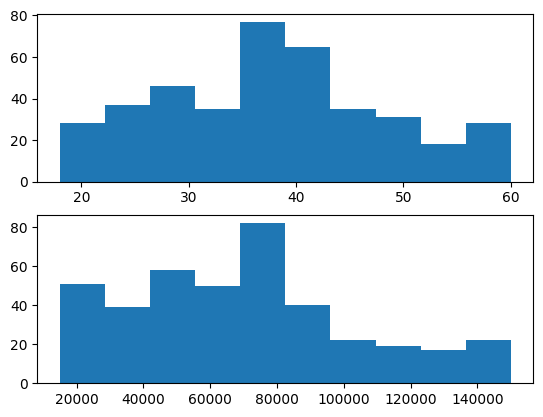

In [10]:
fig, axs = plt.subplots(2)
axs[0].hist(df1['Age'])
axs[1].hist(df1['EstimatedSalary'])
plt.show()

Encoding Gender Column

In [12]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df1['Gender'] = le.fit_transform(df1['Gender'])
df1.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,1,19,19000,0
1,15810944,1,35,20000,0
2,15668575,0,26,43000,0
3,15603246,0,27,57000,0
4,15804002,1,19,76000,0


Splitting x and y

In [235]:
x1=df1.iloc[:,1:-1]
y1=df1.iloc[:,-1]

Scaling the data down

In [236]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(x1)
x1 = scaler.transform(x1)
x1=pd.DataFrame(x1)
x1.head()

From Scratch

## $ p = \frac{1}{1+e^{-(\beta_0+\beta_1x_1+\beta_2x_2\dots\beta_kx_k)}}$

$ \beta_{new}=\beta_{old} + \alpha.(y-p).(1-p).p.x_i $

In [234]:
class LogisticRegressionScratch:

  def sigmoid(self,k):
    return 1/(1+math.exp(-k))

  def fit(self,x,y,alpha=0.3):
    x_copy = x.copy()
    n=len(x_copy)
    x_copy.insert(0, 'wt', 1.0)
    ncols=x_copy.shape[1]
    self.bs=[0]*ncols
    for i in range(n):
      g=0
      for j in range(ncols):
        g=g+self.bs[j]*x_copy.iloc[i,j]
      p=self.sigmoid(g)
      for k in range(ncols):
        self.bs[k]=self.bs[k]+alpha*p*(1-p)*(y.iloc[i]-p)*x_copy.iloc[i,k]
    print(self.bs)

  def predict(self,x):
    y_pred=[]
    for i in range(len(x)):
      k=0
      for j in range(1,len(self.bs)):
        k=k+x.iloc[i][j-1]*self.bs[j]
      y_pred.append(round(self.sigmoid(k)))
    return y_pred


In [238]:
modelscratch=LogisticRegressionScratch()
modelscratch.fit(x1,y1)
y_pred=modelscratch.predict(x1)

[-0.48806227975526595, 0.021532169069109874, 2.131374938388368, 0.7275380734704651]


Scores of Scratch Model

In [239]:
conf_matrix = confusion_matrix(y1,y_pred)
f1 = f1_score(y1,y_pred)
recall = recall_score(y1,y_pred)
precision = precision_score(y1,y_pred)
accuracy = accuracy_score(y1,y_pred)

print("Confusion Matrix: ")
print(conf_matrix)
print("F1 Score: ",f1)
print("Accuracy: ",accuracy)
print("Precision: ",precision)
print("Recall: ",recall)

Confusion Matrix: 
[[186  71]
 [ 12 131]]
F1 Score:  0.7594202898550725
Accuracy:  0.7925
Precision:  0.6485148514851485
Recall:  0.916083916083916


Using Sklearn Library

In [208]:
from sklearn.preprocessing import StandardScaler
x1=df1.iloc[:,1:-1]
y1=df1.iloc[:,-1]
scaler = StandardScaler()
scaler.fit(x1)
x1 = scaler.transform(x1)
x1=pd.DataFrame(x1)
x1.head()

,0,1,2
0,1.020204,-1.781797,-1.490046
1,1.020204,-0.253587,-1.460681
2,-0.980196,-1.113206,-0.785290
3,-0.980196,-1.017692,-0.374182
4,1.020204,-1.781797,0.183751


In [210]:
from sklearn.linear_model import LogisticRegression
skmodel = LogisticRegression()
skmodel.fit(x1, y1)
y_pred = skmodel.predict(x1)

Scores of Sklearn Model

In [211]:
conf_matrix = confusion_matrix(y1,y_pred)
f1 = f1_score(y1,y_pred)
recall = recall_score(y1,y_pred)
precision = precision_score(y1,y_pred)
accuracy = accuracy_score(y1,y_pred)

print("Confusion Matrix: ")
print(conf_matrix)
print("F1 Score: ",f1)
print("Accuracy: ",accuracy)
print("Precision: ",precision)
print("Recall: ",recall)

Confusion Matrix: 
[[237  20]
 [ 39 104]]
F1 Score:  0.7790262172284644
Accuracy:  0.8525
Precision:  0.8387096774193549
Recall:  0.7272727272727273


Diabetes Dataset

Reading the data

In [241]:
df2=pd.read_csv('/content/drive/MyDrive/Datasets/diabetes2.csv')
df2.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


Checking the data

In [247]:
df2.shape

(768, 9)

In [242]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [243]:
df2.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


Splitting x and y

In [248]:
x2=df2.iloc[:,:-1]
y2=df2.iloc[:,-1]

Scaling the data down

In [252]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(x2)
x2 = scaler.transform(x2)
x2=pd.DataFrame(x2)
x2.head()

,0,1,2,3,4,5,6,7
0,0.639947,0.848324,0.149641,0.907270,-0.692891,0.204013,0.468492,1.425995
1,-0.844885,-1.123396,-0.160546,0.530902,-0.692891,-0.684422,-0.365061,-0.190672
2,1.233880,1.943724,-0.263941,-1.288212,-0.692891,-1.103255,0.604397,-0.105584
3,-0.844885,-0.998208,-0.160546,0.154533,0.123302,-0.494043,-0.920763,-1.041549
4,-1.141852,0.504055,-1.504687,0.907270,0.765836,1.409746,5.484909,-0.020496


From Scratch

In [256]:
m2=LogisticRegressionScratch()
m2.fit(x2,y2)
y_pred=m2.predict(x2)

[-0.770476803774999, 0.43448071156735096, 1.5635067978377275, -0.3136849789656919, -0.215391863617325, -0.1055272952566282, 0.6537264610918337, 0.30847804273660884, 0.3897846960585929]


In [258]:
conf_matrix = confusion_matrix(y2,y_pred)
f1 = f1_score(y2,y_pred)
recall = recall_score(y2,y_pred)
precision = precision_score(y2,y_pred)
accuracy = accuracy_score(y2,y_pred)

print("Confusion Matrix: ")
print(conf_matrix)
print("F1 Score: ",f1)
print("Accuracy: ",accuracy)
print("Precision: ",precision)
print("Recall: ",recall)

Confusion Matrix: 
[[361 139]
 [ 52 216]]
F1 Score:  0.6934189406099518
Accuracy:  0.7513020833333334
Precision:  0.6084507042253521
Recall:  0.8059701492537313


Using Sklearn Library

In [261]:
from sklearn.linear_model import LogisticRegression
sm = LogisticRegression()
sm.fit(x2, y2)
y_pred = sm.predict(x2)

In [262]:
conf_matrix = confusion_matrix(y2,y_pred)
f1 = f1_score(y2,y_pred)
recall = recall_score(y2,y_pred)
precision = precision_score(y2,y_pred)
accuracy = accuracy_score(y2,y_pred)

print("Confusion Matrix: ")
print(conf_matrix)
print("F1 Score: ",f1)
print("Accuracy: ",accuracy)
print("Precision: ",precision)
print("Recall: ",recall)

Confusion Matrix: 
[[446  54]
 [112 156]]
F1 Score:  0.6527196652719666
Accuracy:  0.7838541666666666
Precision:  0.7428571428571429
Recall:  0.582089552238806
